In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import folium
from folium.plugins import HeatMap
from plotly.offline import init_notebook_mode, iplot

In [ ]:
df = pd.read_csv('/content/database.csv')

In [ ]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,January,1.0,Murder or Manslaughter,Yes,Male,14.0,Native American/Alaska Native,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0.0,0.0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,1.0,Murder or Manslaughter,Yes,Male,43.0,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0.0,0.0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,March,2.0,Murder or Manslaughter,No,Female,30.0,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0.0,0.0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,April,1.0,Murder or Manslaughter,Yes,Male,43.0,White,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0.0,0.0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980.0,April,2.0,Murder or Manslaughter,No,Female,30.0,Native American/Alaska Native,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,0.0,1.0,FBI


In [ ]:
df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

In [ ]:
df.isnull().sum() # shows number of null data in each column

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              1
City                     1
State                    1
Year                     1
Month                    1
Incident                 1
Crime Type               1
Crime Solved             1
Victim Sex               1
Victim Age               1
Victim Race              1
Victim Ethnicity         1
Perpetrator Sex          1
Perpetrator Age          1
Perpetrator Race         1
Perpetrator Ethnicity    1
Relationship             1
Weapon                   1
Victim Count             1
Perpetrator Count        1
Record Source            1
dtype: int64

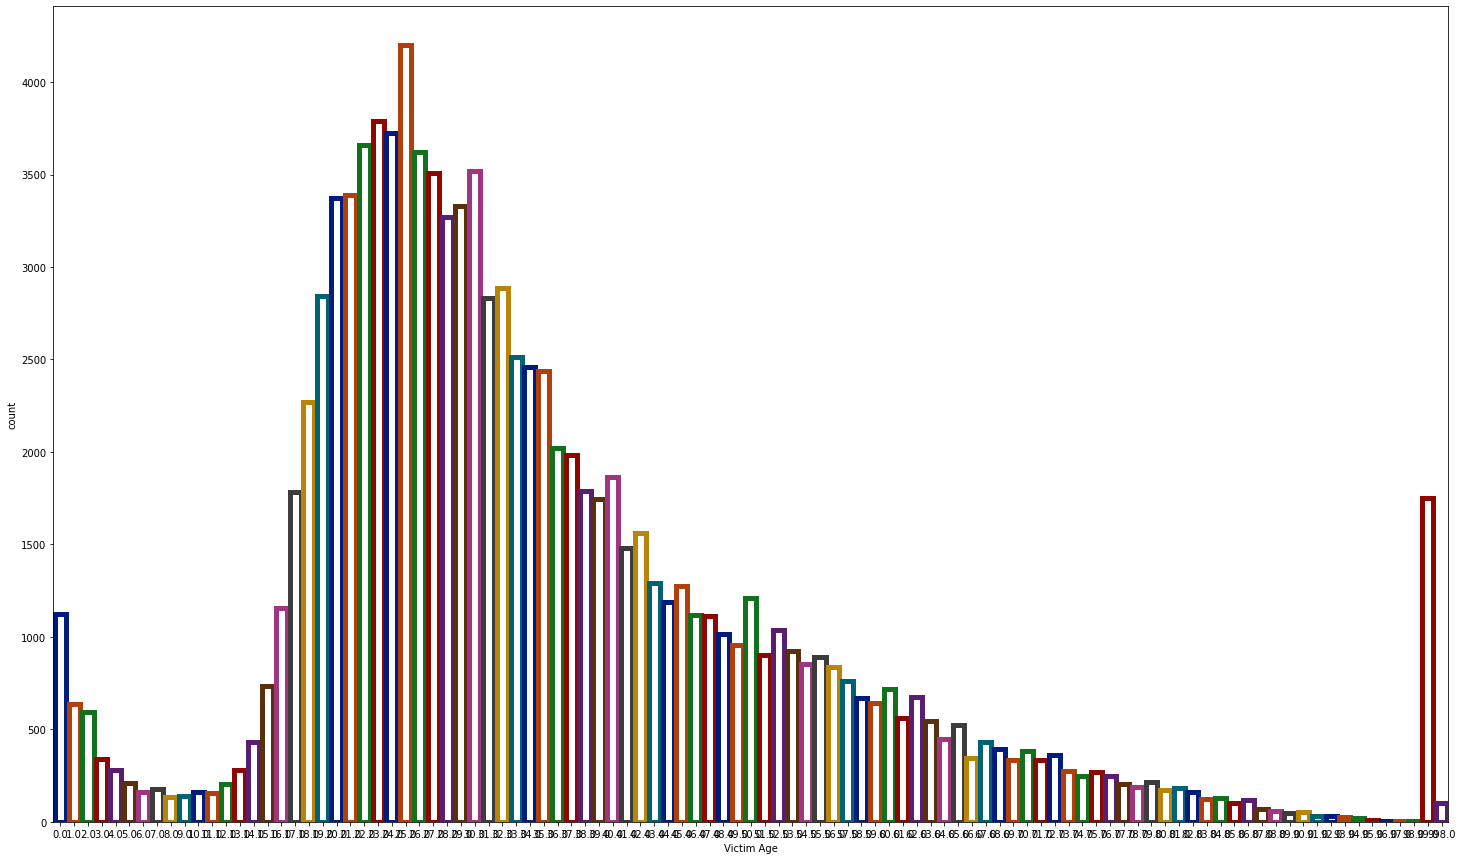

In [ ]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x="Victim Age", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

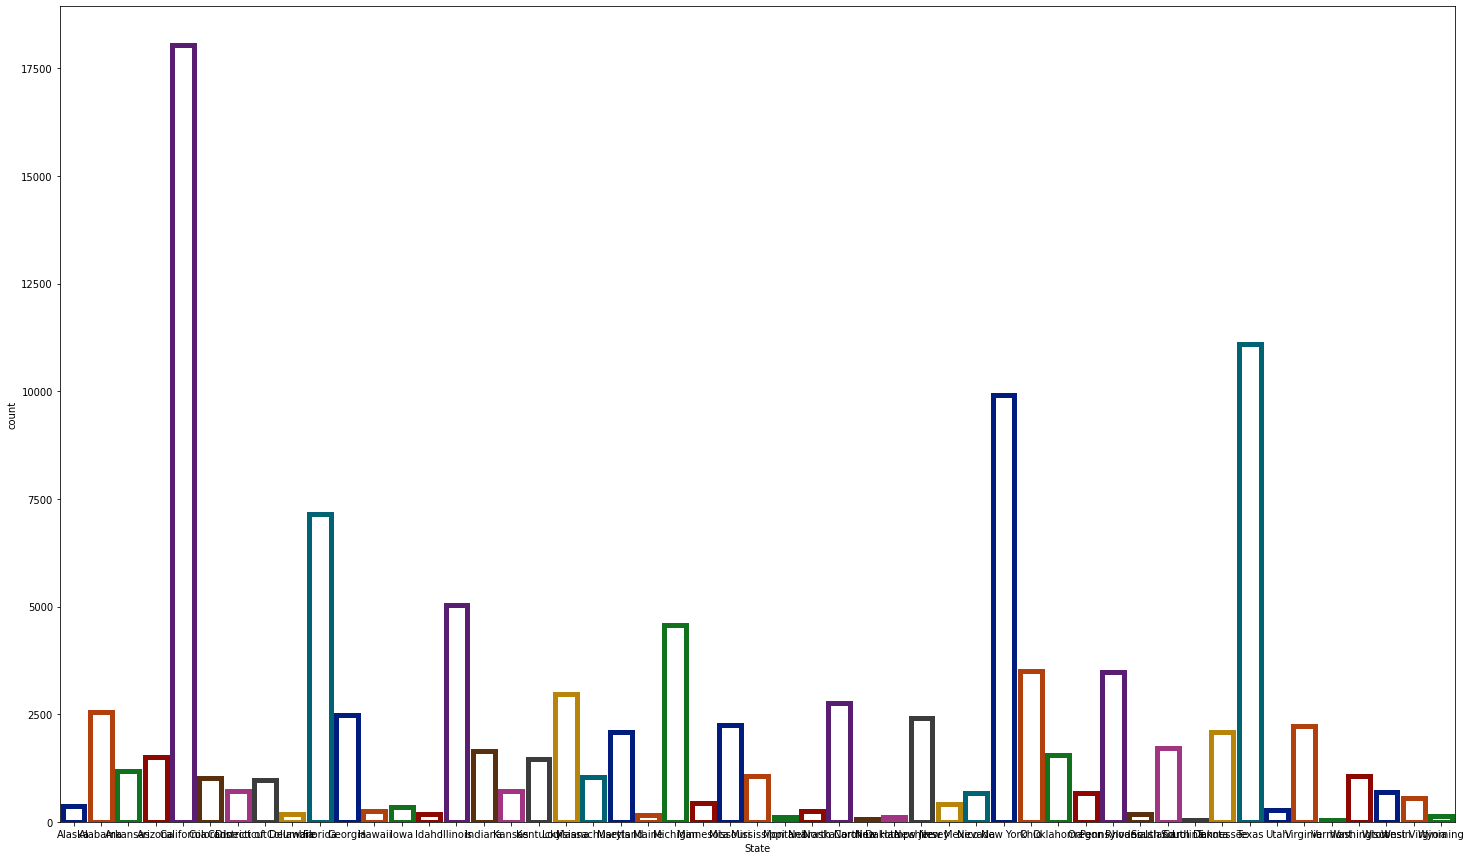

In [ ]:
plt.figure(figsize=(25,15))
ax = sns.countplot(x="State", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 24))

In [ ]:
import numpy as np

In [ ]:
age = df.iloc[:,12]

In [ ]:
age.head()

0    14.0
1    43.0
2    30.0
3    43.0
4    30.0
Name: Victim Age, dtype: float64

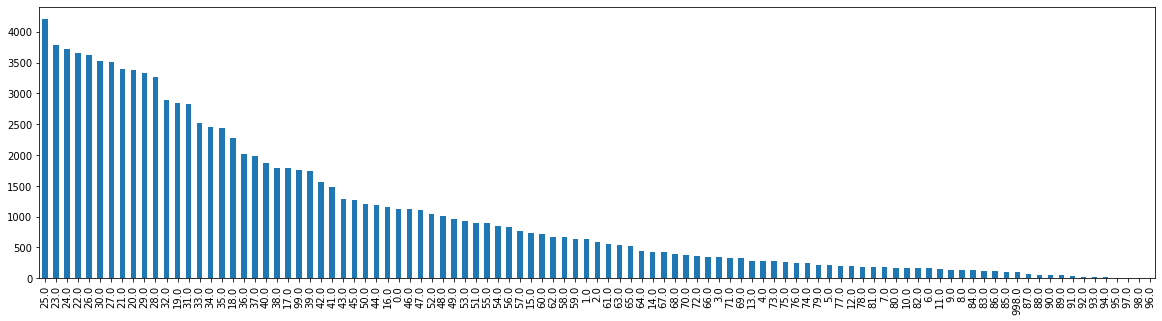

In [ ]:
df['Victim Age'].value_counts().plot(kind='bar', figsize=(20,5))

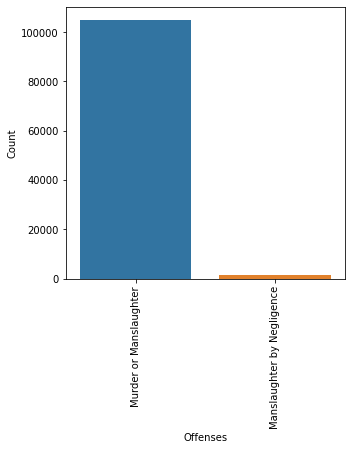

In [ ]:
df2 = pd.DataFrame(columns = ['Offenses'])
df2["Offenses"]=[each for each in df['Crime Type'].unique()]
df2["Count"]=[len(df[df['Crime Type']==each]) for each in df2.Offenses]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(5,5))
sns.barplot(x=df2.Offenses.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Offenses')
plt.ylabel('Count')
plt.show()

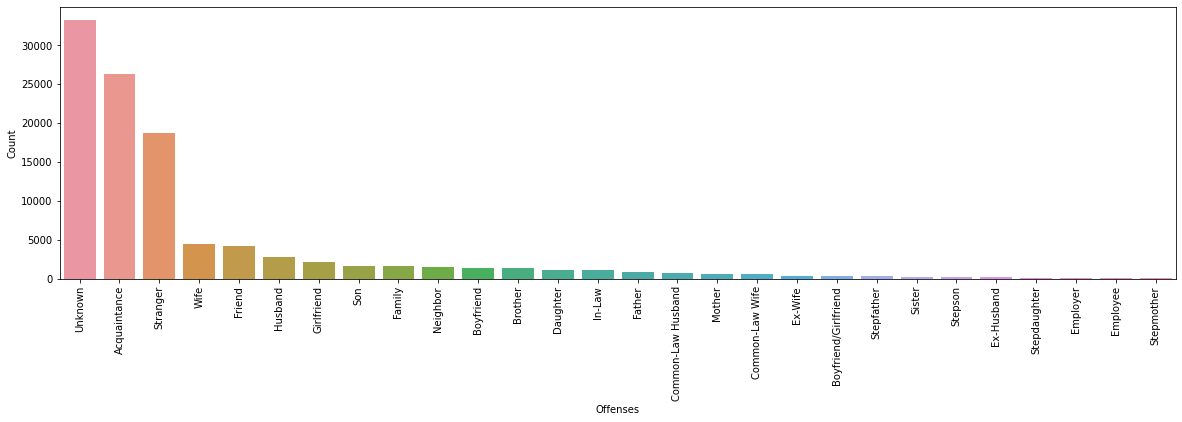

In [ ]:
df2 = pd.DataFrame(columns = ['Offenses'])
df2["Offenses"]=[each for each in df['Relationship'].unique()]
df2["Count"]=[len(df[df['Relationship']==each]) for each in df2.Offenses]
df2=df2.sort_values(by=['Count'],ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(x=df2.Offenses.head(50), y=df2.Count.head(50))
plt.xticks(rotation= 90)
plt.xlabel('Offenses')
plt.ylabel('Count')
plt.show()

In [ ]:
x = df['State']
y = df['Victim Race']

fig = go.Figure(go.Histogram2d(
        x=x,
        y=y
    ))
fig.show()

In [ ]:
labels = df['Victim Race'].unique()
values=[]
for each in labels:
    values.append(len(df[df['Victim Race']==each]))

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

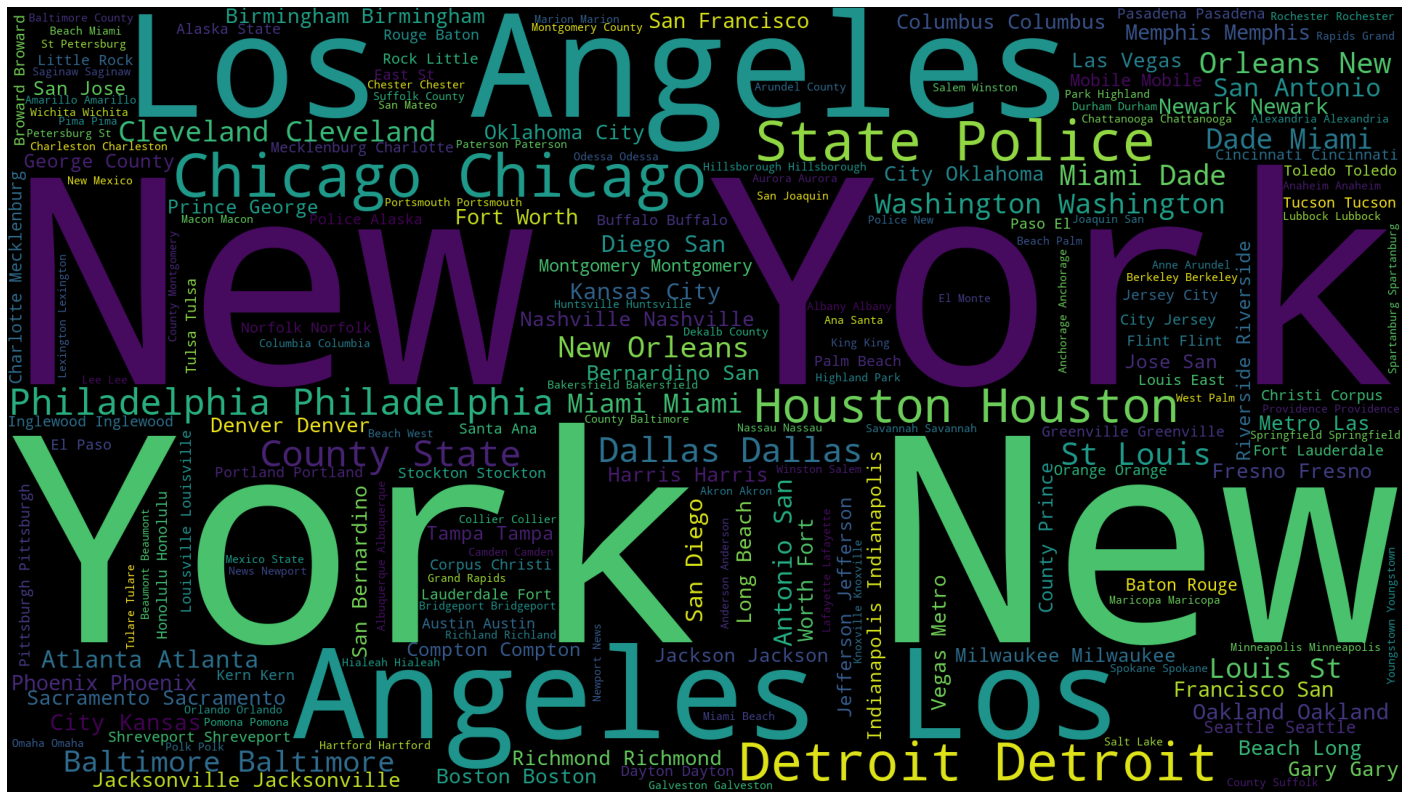

In [ ]:
plt.figure(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df['Agency Name']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()